In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 0. Some pre-defined functions

In [ ]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("../input/edhec-data-for-portfolio-construction-with-python/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets


def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("../input/edhec-data-for-portfolio-construction-with-python/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi

# Browse the new dataset hedge fund indices

In [ ]:
# monthly returns for various kind of hedge fund from 1997-2018
hfi = pd.read_csv("../input/edhec-data-for-portfolio-construction-with-python/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
hfi.head()

# 1. Pre-process the hfi data

In [ ]:
hfi=get_hfi_returns()
hfi.head()

In [ ]:
hfi.info()

# Objective: Whether these hedge fund produce normal returns ?

* Measure the skewness and kurtosis

# Explore the mean median of the dataset

In [ ]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()>hfi.median()],axis='columns')

## Most of the hedge fund mean < median, which indicates negative skewness

# 2. calculate the skewness

![skewness](https://cdn.wallstreetmojo.com/wp-content/uploads/2019/12/Skewness.jpg)

In [ ]:
import scipy.stats

scipy.stats.skew(hfi)

In [ ]:
# visualize the skewness
pd.DataFrame(scipy.stats.skew(hfi),index=hfi.columns).plot.bar()

In [ ]:
hfi.shape

In [ ]:
# test the function of skew in scipy
import numpy as np
normal_rets=np.random.normal(0,0.15,size=(263,1))
scipy.stats.skew(normal_rets)

# 3. compute the Kurtosis (excessive) and Jarque bera test

![Kurtosis](https://cdn.educba.com/academy/wp-content/uploads/2019/12/Kurtosis-Formula.jpg)

In [ ]:
# the scipy package gives the excess kurtosis
scipy.stats.kurtosis(normal_rets)

In [ ]:
scipy.stats.kurtosis(hfi)

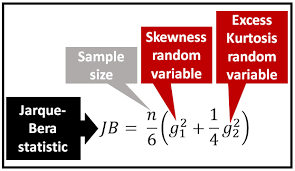

In [ ]:
scipy.stats.jarque_bera(normal_rets)

In [ ]:
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    statistic,p_value=scipy.stats.jarque_bera(r)
    return p_value>level

   

In [ ]:
is_normal(normal_rets)

In [ ]:
hfi.aggregate(is_normal)

# 4. Stock data -- Skewness, Kurtosis, and Jarque-Bera test

In [ ]:
ffme=get_ffme_returns()
ffme.head()

In [ ]:
# skewness
scipy.stats.skew(ffme)

In [ ]:
# kurtosis
scipy.stats.kurtosis(ffme)

In [ ]:
# jarque-bera test
ffme.aggregate(is_normal)